In [2]:
pip install matplotlib seaborn squarify wordcloud folium


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Police Incidents Analysis").getOrCreate()
df = spark.read.csv("gs://bamboo-drive-443401-k6/Police_Department_Incidents_Previous_Year_2016.csv", header=True, inferSchema=True)
df.show(5)


In [2]:
from pyspark.sql.functions import when, count, col
df = df.withColumn("PdDistrict", when(col("PdDistrict").isNull(), "UNKNOWN").otherwise(col("PdDistrict")))
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


NameError: name 'df' is not defined

In [3]:
category_counts = df.groupBy("Category").count().orderBy(col("count").desc())
category_counts.show()


NameError: name 'df' is not defined

In [4]:
df = spark.read.csv("gs://bamboo-drive-443401-k6/Police_Department_Incidents_Previous_Year_2016.csv", header=True, inferSchema=True)
df.printSchema()


root
 |-- IncidntNum: integer (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- PdId: long (nullable = true)



In [5]:
from pyspark.sql.functions import when, count, col
df = df.withColumn("PdDistrict", when(col("PdDistrict").isNull(), "UNKNOWN").otherwise(col("PdDistrict")))
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+
|IncidntNum|Category|Descript|DayOfWeek|Date|Time|PdDistrict|Resolution|Address|  X|  Y|Location|PdId|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+
|         0|       0|       0|        0|   0|   0|         0|         0|      0|  0|  0|       0|   0|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+



In [ ]:
category_counts = df.groupBy("Category").count().orderBy(col("count").desc())
category_counts.show()


In [7]:
df.printSchema()


root
 |-- IncidntNum: integer (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- PdId: long (nullable = true)



In [8]:
category_counts = df.groupBy("Category").count().orderBy(col("count").desc())
category_counts.show(25)


+--------------------+-----+
|            Category|count|
+--------------------+-----+
|       LARCENY/THEFT|40409|
|      OTHER OFFENSES|19599|
|        NON-CRIMINAL|17866|
|             ASSAULT|13577|
|           VANDALISM| 8589|
|       VEHICLE THEFT| 6419|
|            WARRANTS| 5914|
|            BURGLARY| 5802|
|      SUSPICIOUS OCC| 5782|
|      MISSING PERSON| 4338|
|       DRUG/NARCOTIC| 4243|
|             ROBBERY| 3299|
|               FRAUD| 2635|
|     SECONDARY CODES| 1841|
|            TRESPASS| 1812|
|         WEAPON LAWS| 1658|
|SEX OFFENSES, FOR...|  940|
|     STOLEN PROPERTY|  882|
|   RECOVERED VEHICLE|  736|
|  DISORDERLY CONDUCT|  658|
|        PROSTITUTION|  641|
|FORGERY/COUNTERFE...|  619|
|         DRUNKENNESS|  465|
|DRIVING UNDER THE...|  378|
|               ARSON|  286|
+--------------------+-----+
only showing top 25 rows



In [9]:
district_counts = df.groupBy("PdDistrict").count().orderBy(col("count").desc())
district_counts.show()


+----------+-----+
|PdDistrict|count|
+----------+-----+
|  SOUTHERN|28445|
|  NORTHERN|20100|
|   MISSION|19503|
|   CENTRAL|17666|
|   BAYVIEW|14303|
| INGLESIDE|11594|
|   TARAVAL|11325|
|TENDERLOIN| 9942|
|  RICHMOND| 8922|
|      PARK| 8699|
|   UNKNOWN|    1|
+----------+-----+



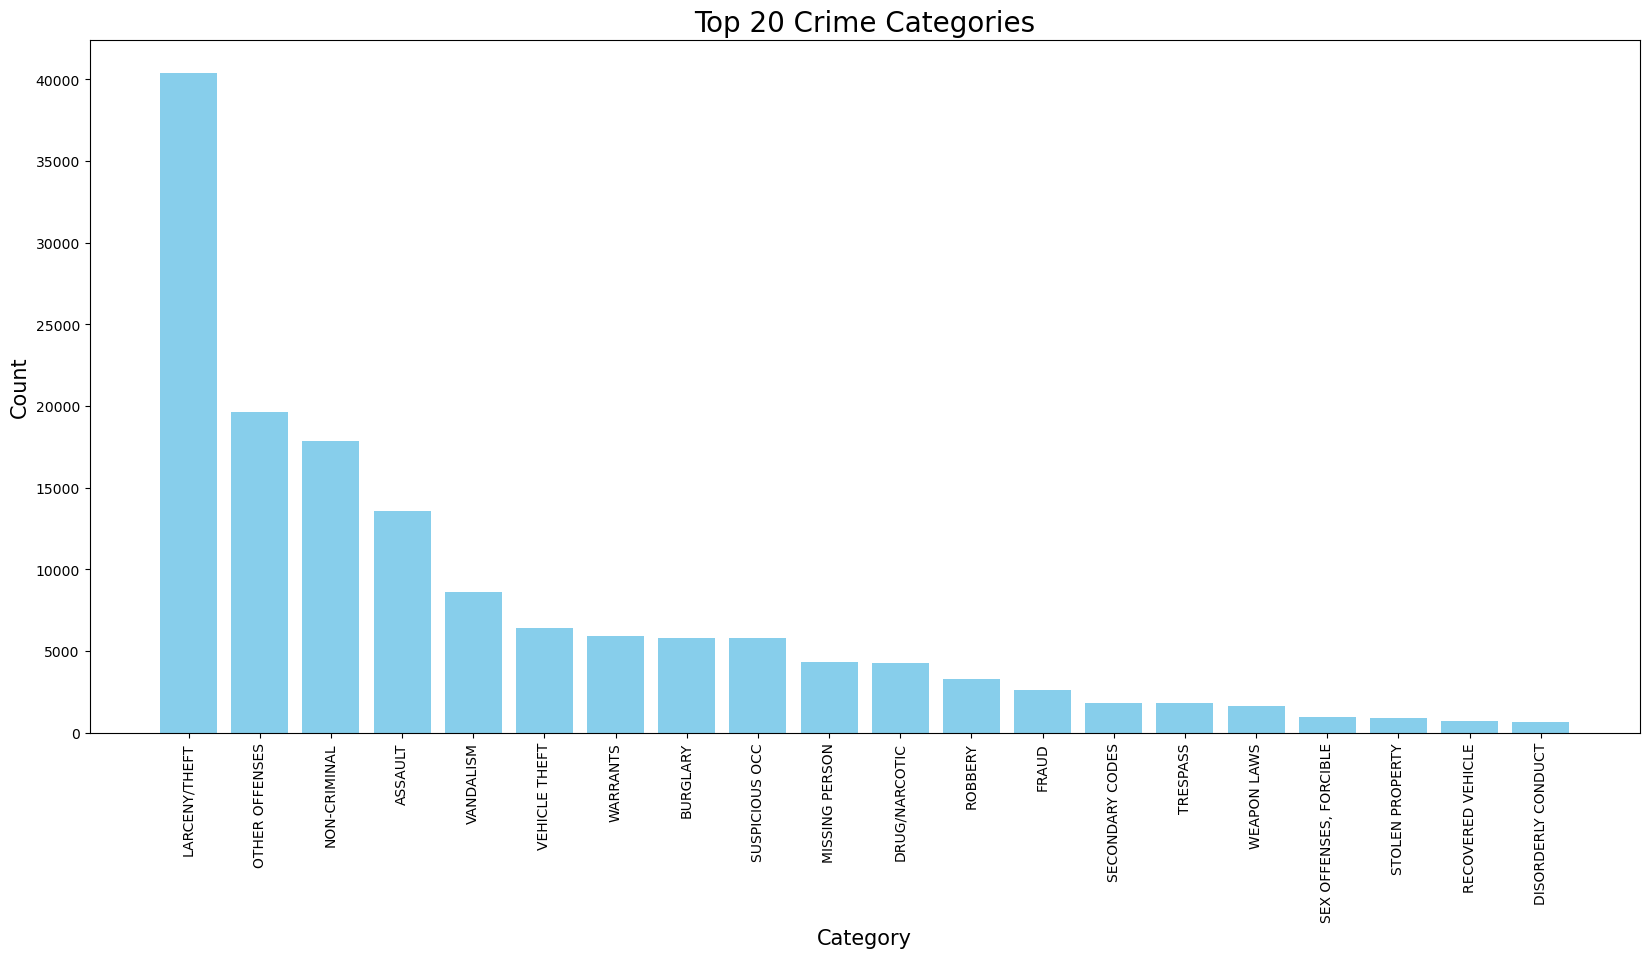

In [13]:
import matplotlib.pyplot as plt

# Collect data for visualization
category_data = category_counts.collect()

# Prepare data for plotting
categories = [row['Category'] for row in category_data[:20]]
counts = [row['count'] for row in category_data[:20]]

# Plot
plt.figure(figsize=(20, 9))
plt.bar(categories, counts, color="skyblue")
plt.title("Top 20 Crime Categories", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90)
plt.show()


In [14]:
# Collect data
day_data = day_counts.collect()

# Prepare data for plotting
days = [row['DayOfWeek'] for row in day_data]
counts = [row['count'] for row in day_data]

# Plot
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=days, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Crimes by Day of the Week", fontsize=20)
plt.show()


NameError: name 'day_counts' is not defined

In [16]:
# Collect data
day_data = day_counts.collect()

# Prepare data for plotting
days = [row['DayOfWeek'] for row in day_data]
counts = [row['count'] for row in day_data]

# Plot
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=days, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Crimes by Day of the Week", fontsize=20)
plt.show()


NameError: name 'day_counts' is not defined

In [17]:
# Crimes by Day of the Week
day_counts = df.groupBy("DayOfWeek").count().orderBy(col("count").desc())
day_counts.show()


+---------+-----+
|DayOfWeek|count|
+---------+-----+
|   Friday|23371|
| Saturday|22172|
| Thursday|21395|
|Wednesday|21332|
|  Tuesday|21242|
|   Monday|20783|
|   Sunday|20205|
+---------+-----+



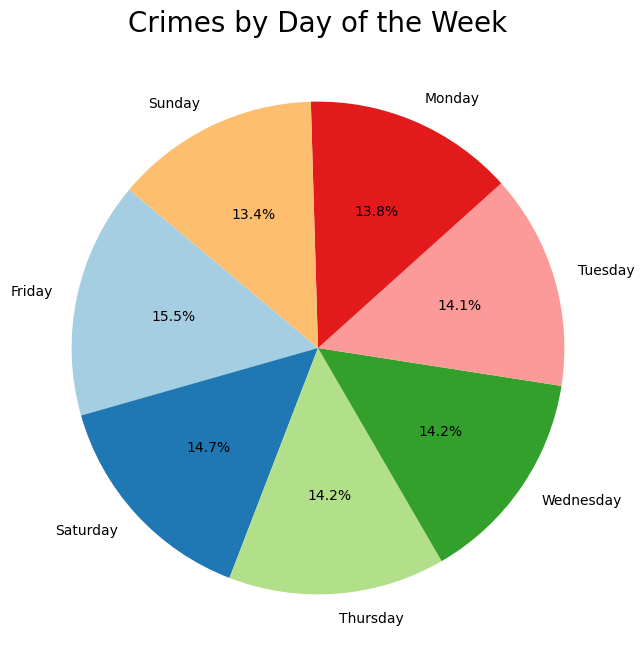

In [18]:
# Collect data
day_data = day_counts.collect()

# Prepare data for plotting
days = [row['DayOfWeek'] for row in day_data]
counts = [row['count'] for row in day_data]

# Plot
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=days, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Crimes by Day of the Week", fontsize=20)
plt.show()

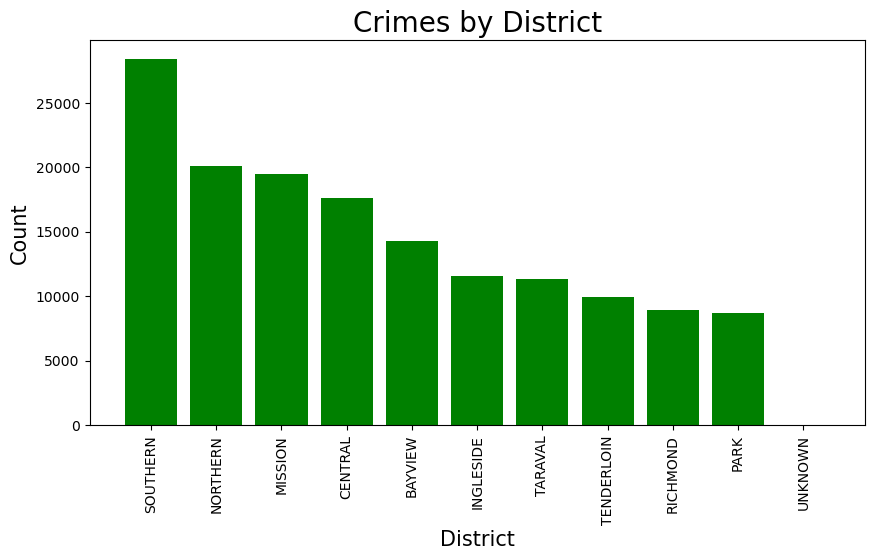

In [20]:
# Collect data
district_data = district_counts.collect()

# Prepare data for plotting
districts = [row['PdDistrict'] for row in district_data]
counts = [row['count'] for row in district_data]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(districts, counts, color="green")
plt.title("Crimes by District", fontsize=20)
plt.xlabel("District", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90)
plt.show()


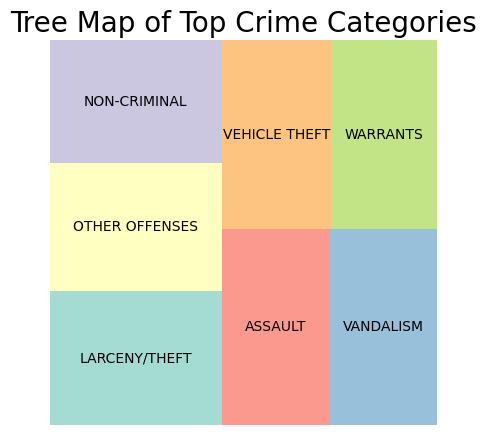

In [27]:
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for plotting
sizes = counts[:20]  # Use only top 20
labels = categories[:20]

# Use a vibrant color palette from Seaborn
colors = sns.color_palette("Set3", n_colors=len(sizes))

# Plot
plt.figure(figsize=(5, 5))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)
plt.axis('off')
plt.title("Tree Map of Top Crime Categories", fontsize=20)
plt.show()


In [28]:
district_geo_counts = district_counts.collect()

# Prepare data as a dictionary for folium
district_geo_data = {row["PdDistrict"]: row["count"] for row in district_geo_counts}


In [29]:
import folium

# Define the GeoJSON file for San Francisco districts
geo_json_url = "https://cocl.us/sanfran_geojson"

# Create a folium map
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
sf_map.choropleth(
    geo_data=geo_json_url,
    data=district_geo_data,
    key_on="feature.properties.DISTRICT",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Count by District"
)

# Save map to an HTML file
sf_map.save("crime_map.html")
print("Map saved as crime_map.html. Open it in your browser.")


AttributeError: 'Map' object has no attribute 'choropleth'

In [30]:
import folium
from folium import Choropleth

# Define the GeoJSON file for San Francisco districts
geo_json_url = "https://cocl.us/sanfran_geojson"

# Create a folium map
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

# Add Choropleth layer
Choropleth(
    geo_data=geo_json_url,
    data=district_geo_data.items(),  # Convert dictionary to an iterable
    columns=["key", "value"],  # Specify column names for the key-value pair
    key_on="feature.properties.DISTRICT",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Count by District"
).add_to(sf_map)

# Save map to an HTML file
sf_map.save("crime_map.html")
print("Map saved as crime_map.html. Open it in your browser.")


Map saved as crime_map.html. Open it in your browser.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import hour

# Initialize Spark Session
spark = SparkSession.builder.appName("Crime Prediction").getOrCreate()

# Load dataset
df = spark.read.csv("gs://bamboo-drive-443401-k6/Police_Department_Incidents_Previous_Year_2016.csv", header=True, inferSchema=True)

# Handle missing values
from pyspark.sql.functions import when, col
df = df.withColumn("PdDistrict", when(col("PdDistrict").isNull(), "UNKNOWN").otherwise(col("PdDistrict")))

# Feature Engineering
day_indexer = StringIndexer(inputCol="DayOfWeek", outputCol="DayOfWeekIndex")
district_indexer = StringIndexer(inputCol="PdDistrict", outputCol="PdDistrictIndex")
category_indexer = StringIndexer(inputCol="Category", outputCol="CategoryIndex")

df = day_indexer.fit(df).transform(df)
df = district_indexer.fit(df).transform(df)
df = category_indexer.fit(df).transform(df)

# Convert Time to hours
df = df.withColumn("Hour", hour("Time"))

# Assemble features
assembler = VectorAssembler(
    inputCols=["DayOfWeekIndex", "PdDistrictIndex", "Hour", "X", "Y"],
    outputCol="features"
)
df = assembler.transform(df)

# Split data
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Train Random Forest Model
rf = RandomForestClassifier(featuresCol="features", labelCol="CategoryIndex", numTrees=100)
model = rf.fit(train_data)

# Make Predictions
predictions = model.transform(test_data)

# Evaluate Model
evaluator = MulticlassClassificationEvaluator(
    labelCol="CategoryIndex", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy}")


24/12/03 06:09:06 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1836.2 KiB
24/12/03 06:09:15 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1469.7 KiB


Model Accuracy: 0.2807226918614288
